<a href="https://colab.research.google.com/github/cindmichelle/mask_rcnn_istar/blob/master/gaussian_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd
%cd ../content/drive/"My Drive"/"dataset zip"

/root
/content/drive/My Drive/dataset zip


In [0]:
import zipfile

zip_ref = zipfile.ZipFile('dataset.zip', 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [0]:
%cd
%cd ../content/dataset/

/root
/content/dataset


In [0]:
import numpy as np

def gaussian_noise(input):
  mean = 0
  var = 0.1
  sigma = var**0.5

  height, width, channel = input.shape
  # img = np.array(input, dtype=np.int32)
  gauss = np.random.normal(mean,sigma,(height,width, channel))
  gauss = gauss.reshape(height,width,channel)
  noisy = input + gauss
  return noisy

# Plot the image.
def display_image(img):
  plt.figure(); plt.imshow(img)
  plt.grid(False);  plt.axis('off'); plt.show()
  

In [0]:
%cd train

/content/dataset/train


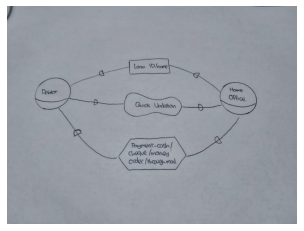

In [24]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("1.jpeg")
gaussian = gaussian_noise(img)
# plt.imshow(img)
# plt.imshow(gaussian)
# cv2.imwrite('ngecek' +'.jpg',img)
# plt.imshow(img)

display_image(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


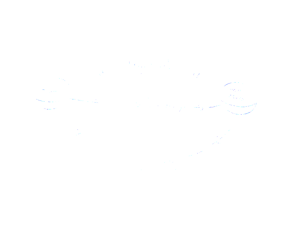

In [25]:

display_image(gaussian)